# Data Preparation

In [1]:
import pandas as pd

# Import the dataset using Pandas
data = pd.read_csv('craigslist_vehicles.csv')  
# Handling missing values
# Filling missing values with median for numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Filling missing values with mode for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Convert 'posting_date' column to datetime data type
data['posting_date'] = pd.to_datetime(data['posting_date'])

# Check the data types to ensure successful conversion
print(data.dtypes)




Unnamed: 0                    int64
id                            int64
url                          object
region                       object
region_url                   object
price                         int64
year                        float64
manufacturer                 object
model                        object
condition                    object
cylinders                    object
fuel                         object
odometer                    float64
title_status                 object
transmission                 object
VIN                          object
drive                        object
size                         object
type                         object
paint_color                  object
image_url                    object
description                  object
county                      float64
state                        object
lat                         float64
long                        float64
posting_date    datetime64[ns, UTC]
removal_date                

# Data Exploration:

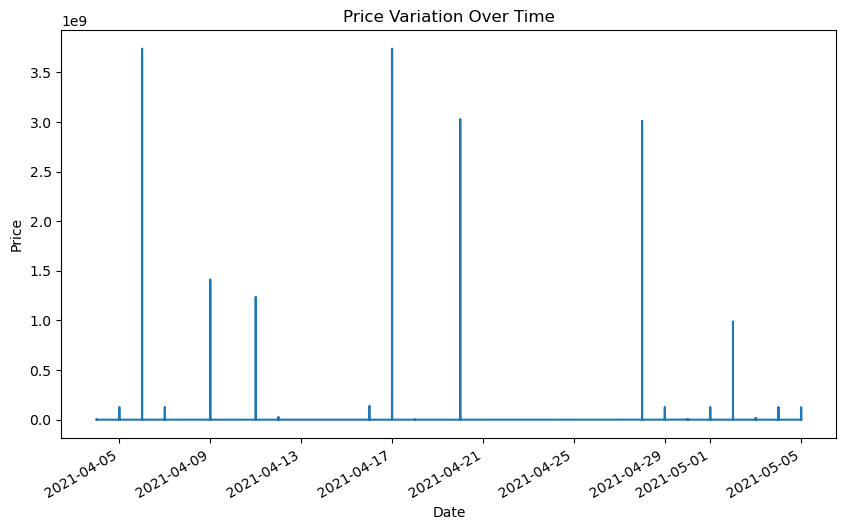

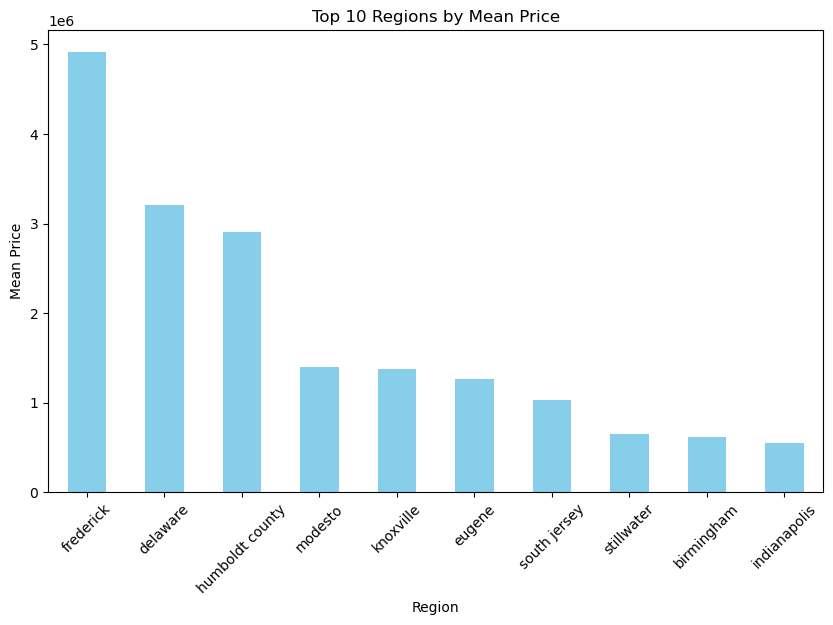

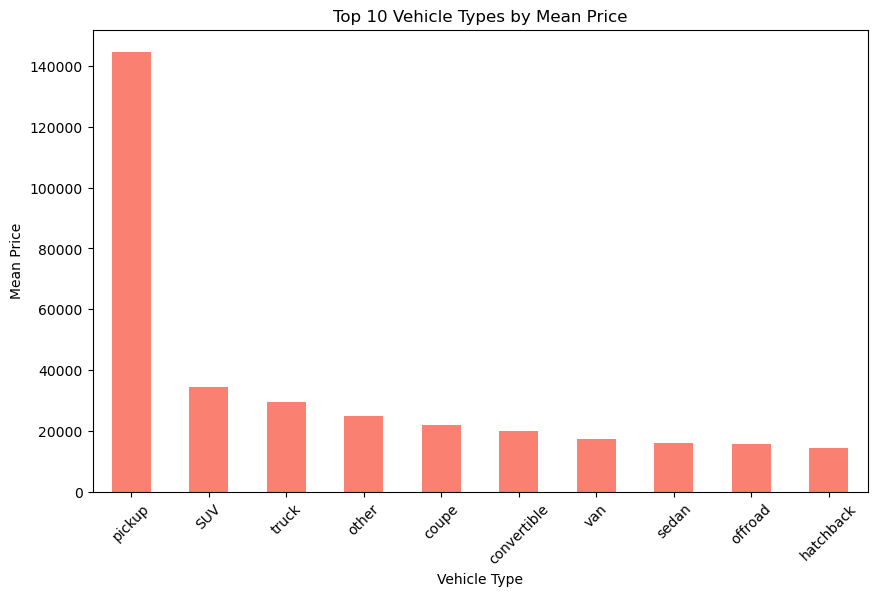

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset
data = pd.read_csv('craigslist_vehicles.csv')  

# Convert 'posting_date' column to datetime
data['posting_date'] = pd.to_datetime(data['posting_date'])

# Set 'posting_date' as the index
data.set_index('posting_date', inplace=True)

# Visualizing seasonal trends with a time-series plot
plt.figure(figsize=(10, 6))
data['price'].plot()  # Assuming 'price' is the column related to the value you're interested in
plt.title('Price Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Grouping by region to analyze demand-supply dynamics
grouped_by_region = data.groupby('region')['price'].mean().sort_values(ascending=False)
top_regions = grouped_by_region.head(10)  # Selecting top 10 regions by mean price

plt.figure(figsize=(10, 6))
top_regions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Regions by Mean Price')
plt.xlabel('Region')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

# Grouping by vehicle type to analyze demand-supply dynamics
grouped_by_type = data.groupby('type')['price'].mean().sort_values(ascending=False)
top_types = grouped_by_type.head(10)  # Selecting top 10 vehicle types by mean price

plt.figure(figsize=(10, 6))
top_types.plot(kind='bar', color='salmon')
plt.title('Top 10 Vehicle Types by Mean Price')
plt.xlabel('Vehicle Type')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()


# Building Time-Series Chart

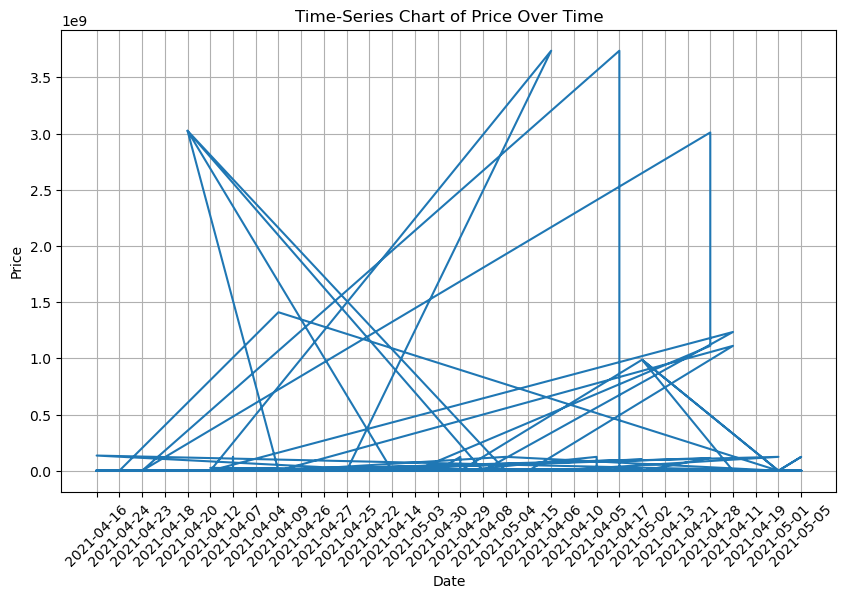

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset and set 'posting_date' as the index
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('craigslist_vehicles.csv', parse_dates=['posting_date'], index_col='posting_date')

# Reset index to 'posting_date' column
data.reset_index(inplace=True)

# Convert 'posting_date' to string format for plotting (Handle NaN values)
data['posting_date'] = data['posting_date'].dt.strftime('%Y-%m-%d')

# Remove rows where 'posting_date' is NaN or NaT
data = data.dropna(subset=['posting_date'])

# Plotting a time-series chart for the 'price' column over time
plt.figure(figsize=(10, 6))
plt.plot(data['posting_date'], data['price'])  # Plot 'posting_date' against 'price'
plt.title('Time-Series Chart of Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
